# Л.р. №8 Гаврилюк и Ермаков

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Часть 1

#### Класс с четырьмя разностными методами решения д.у.

In [3]:
class Solver(): 
    
    def __init__(self, grid, f, u_0):
        self.x = grid
        self.f = f
        self.u_0 = u_0
        self.h = grid[1] - grid[0]
        
    
    def Euler(self):
        y = np.zeros(len(self.x))
        y[0] = self.u_0
        for i in range(len(self.x)-1):
            y[i+1] = y[i] + self.h * self.f(self.x[i], y[i])
        return y

    def Modified_Euler(self):
        y = np.zeros(len(self.x))
        y[0] = self.u_0
        for i in range(len(self.x)-1):
            predictor = y[i] + self.h * self.f(self.x[i], y[i])
            y[i+1] = y[i] + 0.5 * self.h * (self.f(self.x[i], y[i]) + self.f(self.x[i+1], predictor))
        return y

    def Upgraded_Euler(self):
        y = np.zeros(len(self.x))
        y[0] = self.u_0
        for i in range(len(self.x)-1):
            predictor = y[i] + 0.5 * self.h * self.f(self.x[i], y[i])
            y[i+1] = y[i] + self.h * self.f(self.x[i]+0.5*self.h, predictor)
        return y

    def Runge_Kutta(self, slice_for_Adams=False):
        if slice_for_Adams:
            grid = self.x[:4]
        else:
            grid = self.x
        y = np.zeros(len(grid))
        y[0] = self.u_0
        for i in range(len(grid)-1):
            k_0 = self.f(grid[i], y[i])
            k_1 = self.f(grid[i] + self.h/2, y[i] + self.h * k_0 / 2)
            k_2 = self.f(grid[i] + self.h/2, y[i] + self.h * k_1 / 2)
            k_3 = self.f(grid[i] + self.h, y[i] + self.h * k_2)
            y[i+1] = y[i] + self.h / 6 * (k_0 + 2 * k_1 + 2 * k_2 + k_3)
        return y    
    
    def Adams(self, eps):
        y = np.append(self.Runge_Kutta(slice_for_Adams=True), np.zeros(len(self.x)-4))
        iters = np.ones(len(self.x))
        for i in range(3, len(self.x)-1):
            pred = y[i] + self.h / 24 * (55 * self.f(self.x[i], y[i]) - 59 * self.f(self.x[i-1], y[i-1]) + 37 * self.f(self.x[i-2], y[i-2]) - 9 * self.f(self.x[i-3], y[i-3]))
            buffer = [pred, pred]
            while True:
                buffer[1] = y[i] + self.h / 24 * (9 * self.f(self.x[i+1], buffer[0]) + 19 * self.f(self.x[i], y[i]) - 5 * self.f(self.x[i-1], y[i-1]) + self.f(self.x[i-2], y[i-2]))
                if abs(buffer[1]-buffer[0]) <= eps:
                    y[i+1] = buffer[1]
                    break
                buffer[0] = buffer[1]
                iters[i] += 1
        return y, iters

#### Определение н.у. и аналитического решения

In [4]:
f = lambda x, u: (2 - u) * np.tan(x)
actual = lambda x: 2 - 3 * np.cos(x)

In [5]:
ns = [5, 10, 20, 50, 100, 1_000]
u_0 = -1

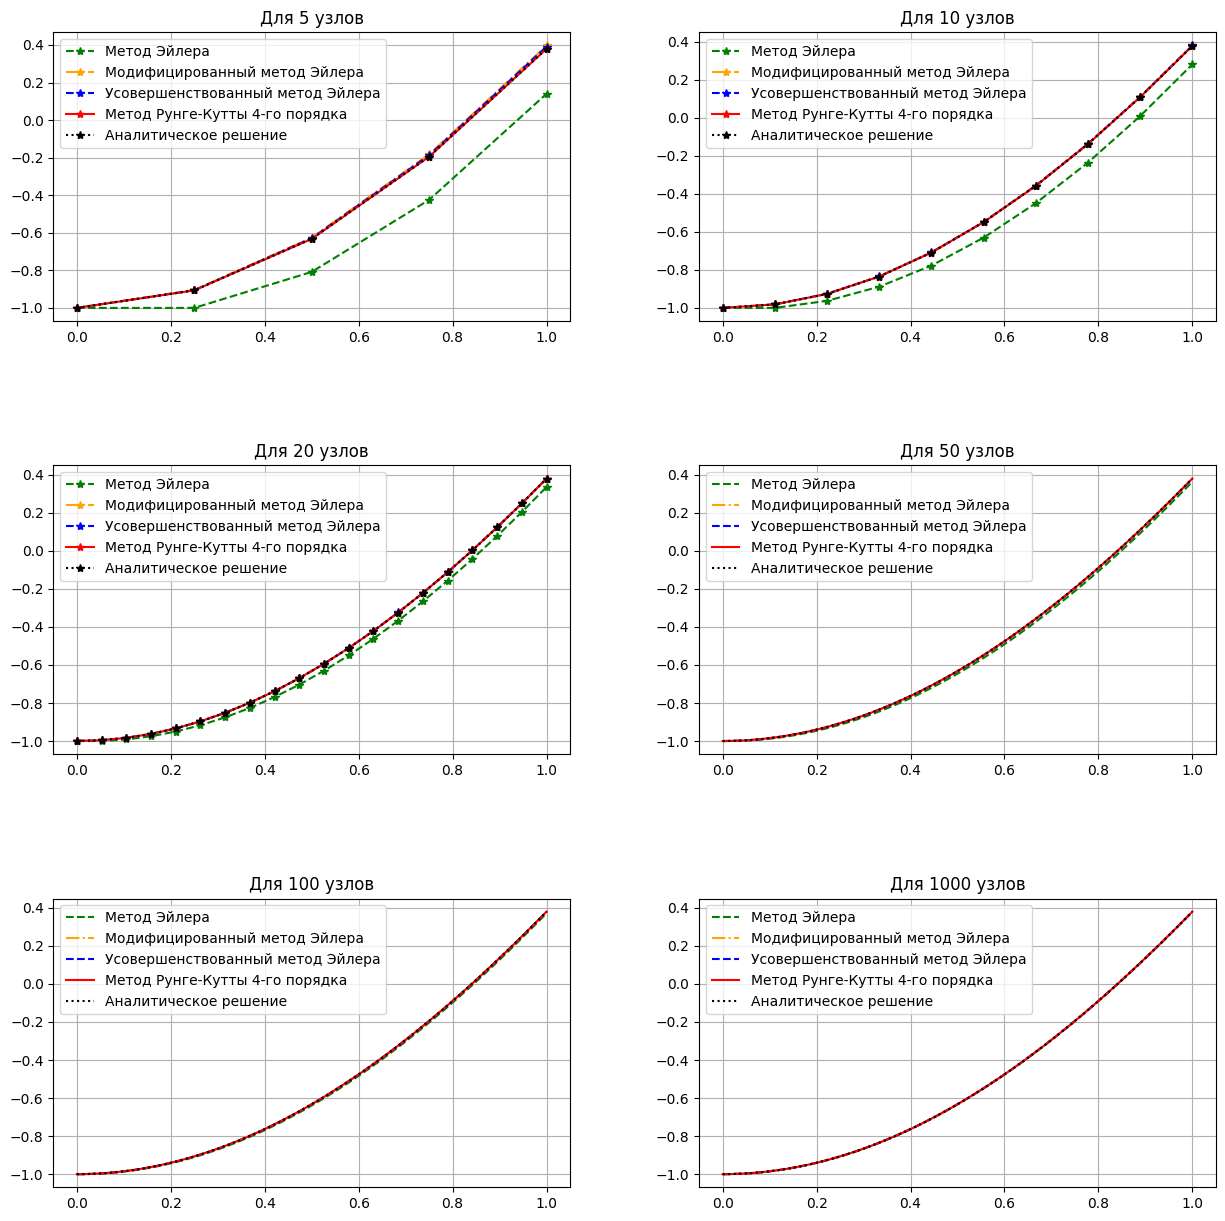

In [6]:
fig, axis = plt.subplots(3, 2)

grids = []
solvers = []

fig.set_figwidth(15)
fig.set_figheight(15)
fig.subplots_adjust(wspace = 0.25, hspace = 0.5)

for n in ns:
    grid = np.linspace(0, 1, n)
    grids.append(grid)
    solvers.append(Solver(grid=grid, f=f, u_0=u_0))

for ax, grid, solver in zip(axis.flatten(), grids, solvers):
    ax.grid(True)
    if len(grid) < 50:
        ax.plot(grid, solver.Euler(), '*--', color='green', label='Метод Эйлера')
        ax.plot(grid, solver.Modified_Euler(), '*-.', color='orange', label='Модифицированный метод Эйлера')
        ax.plot(grid, solver.Upgraded_Euler(), '*--', color='blue', label='Усовершенствованный метод Эйлера')
        ax.plot(grid, solver.Runge_Kutta(), '*-', color='red', label='Метод Рунге-Кутты 4-го порядка')
        ax.plot(grid, actual(grid), '*:', color='black', label='Аналитическое решение')
    else:
        ax.plot(grid, solver.Euler(), '--', color='green', label='Метод Эйлера')
        ax.plot(grid, solver.Modified_Euler(), '-.', color='orange', label='Модифицированный метод Эйлера')
        ax.plot(grid, solver.Upgraded_Euler(), '--', color='blue', label='Усовершенствованный метод Эйлера')
        ax.plot(grid, solver.Runge_Kutta(), '-', color='red', label='Метод Рунге-Кутты 4-го порядка')
        ax.plot(grid, actual(grid), ':', color='black', label='Аналитическое решение')
    ax.set_title(f'Для {len(grid)} узлов')
    ax.legend()
    
fig.savefig('res1', dpi=600)

# Часть 2

#### Класс с двумя разностными методами решения д.у.

In [7]:
class Solver2():
    def __init__(self, grid, f, x_0=0, v_0=1):
        self.grid = grid
        self.x_0 = x_0
        self.v_0 = v_0
        self.f = f
        self.h = self.grid[1] - self.grid[0]
        
    def Euler_Krommer(self):
    
        x = np.zeros(len(self.grid))
        v = np.zeros(len(self.grid))
        x[0] = self.x_0
        v[0] = self.v_0

        for i in range(len(self.grid) - 1):
            v[i+1] = v[i] + self.h * f(x[i], v[i])
            x[i+1] = x[i] + self.h * v[i+1]
        return x
    
    def Euler(self):
        x = np.zeros(len(self.grid))
        v = np.zeros(len(self.grid))
        x[0] = self.x_0
        v[0] = self.v_0

        for i in range(len(self.grid) - 1):
            v[i+1] = v[i] + self.h * f(x[i], v[i])
            x[i+1] = x[i] + self.h * v[i]
        return x

#### Определение н.у. и аналитического решения

In [8]:
f2 = lambda x, v: -10 * v - 16 * x
actual2 = lambda x: 1 / 6 * np.exp(-8*x) * (np.exp(6*x) - 1)

In [9]:
x_0 = 0
v_0 = 1

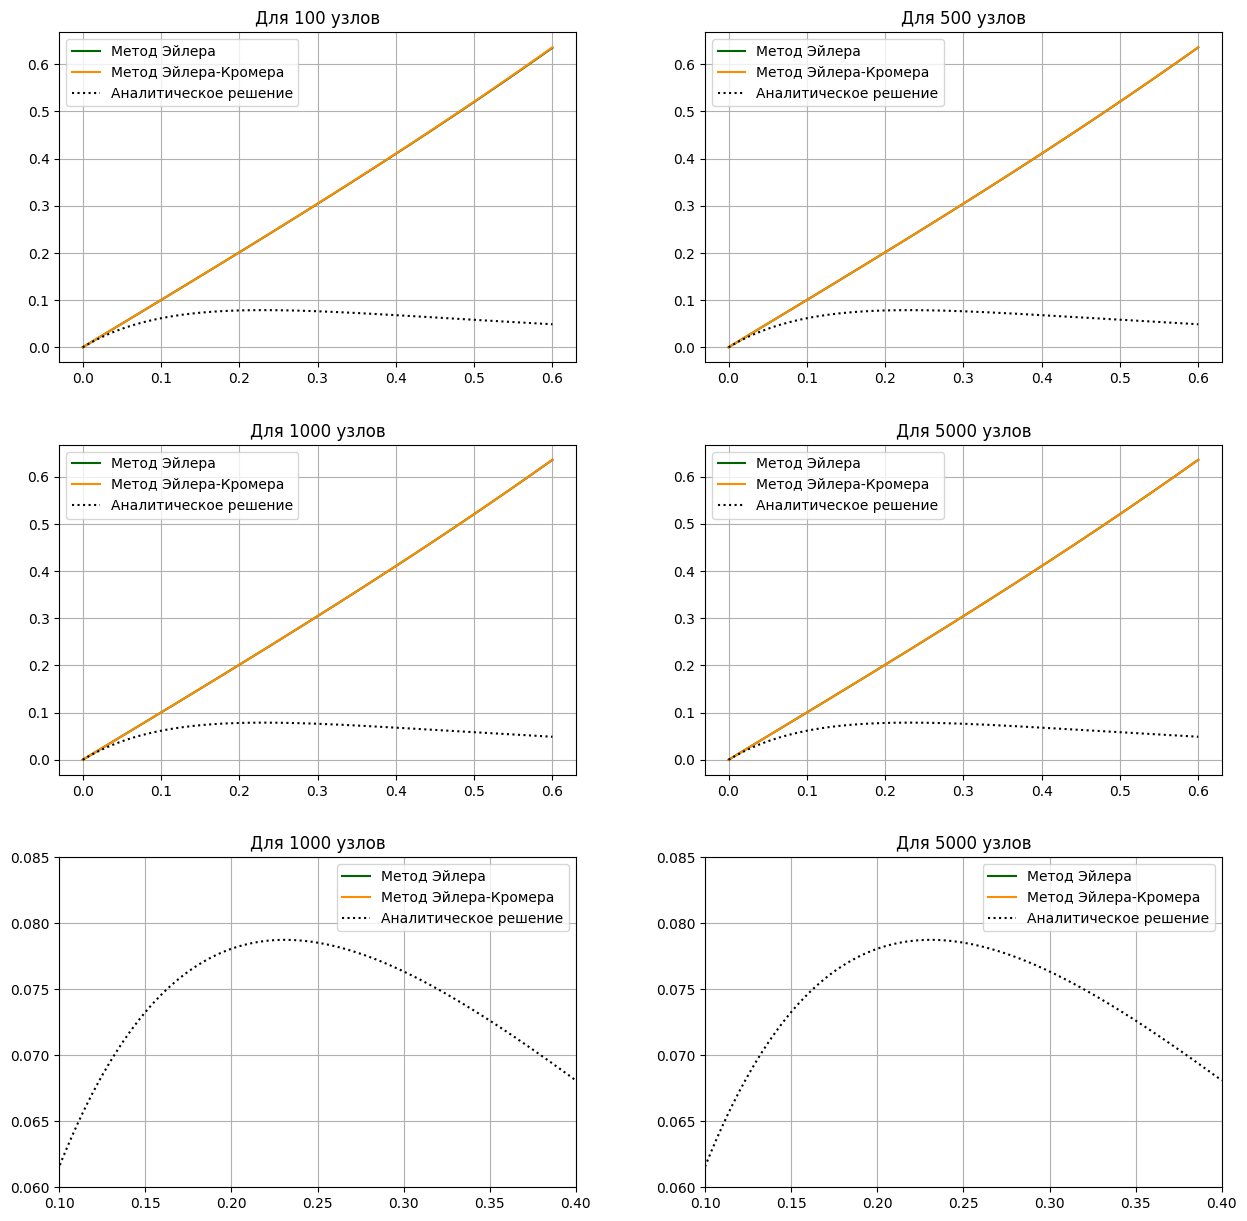

In [10]:
fig, axis = plt.subplots(3, 2)

ns2 = [100, 500, 1_000, 5_000, 1_000, 5_000]
grids2 = []
solvers2 = []
flags = [0, 0, 0, 0, 1, 1]

fig.set_figwidth(15)
fig.set_figheight(15)
fig.subplots_adjust(wspace = 0.25, hspace = 0.25)


for n in ns2:
    grid2 = np.linspace(0, 0.6, n)
    grids2.append(grid2)
    solvers2.append(Solver2(grid=grid2, f=f2))
    
for ax, grid, solver, flag in zip(axis.flatten(), grids2, solvers2, flags):
    ax.grid()
    ax.plot(grid, solver.Euler(), color='darkgreen', label='Метод Эйлера')
    ax.plot(grid, solver.Euler_Krommer(), color='darkorange', label='Метод Эйлера-Кромера')
    ax.plot(grid, actual2(grid), ':', color='black', label='Аналитическое решение')
    ax.set_title(f'Для {len(grid)} узлов')
    ax.legend()
    if flag:
        ax.set_ylim(0.06, 0.085)
        ax.set_xlim(0.1, 0.4)
        
fig.savefig('res2', dpi=600)

In [12]:
solvers2[0].f

<function __main__.<lambda>(x, v)>

# Л.р. №9 Гаврилюк и Ермаков

# Часть 2

In [10]:
ns = [7, 15, 25, 100]
u_0 = -1
eps = 1e-10

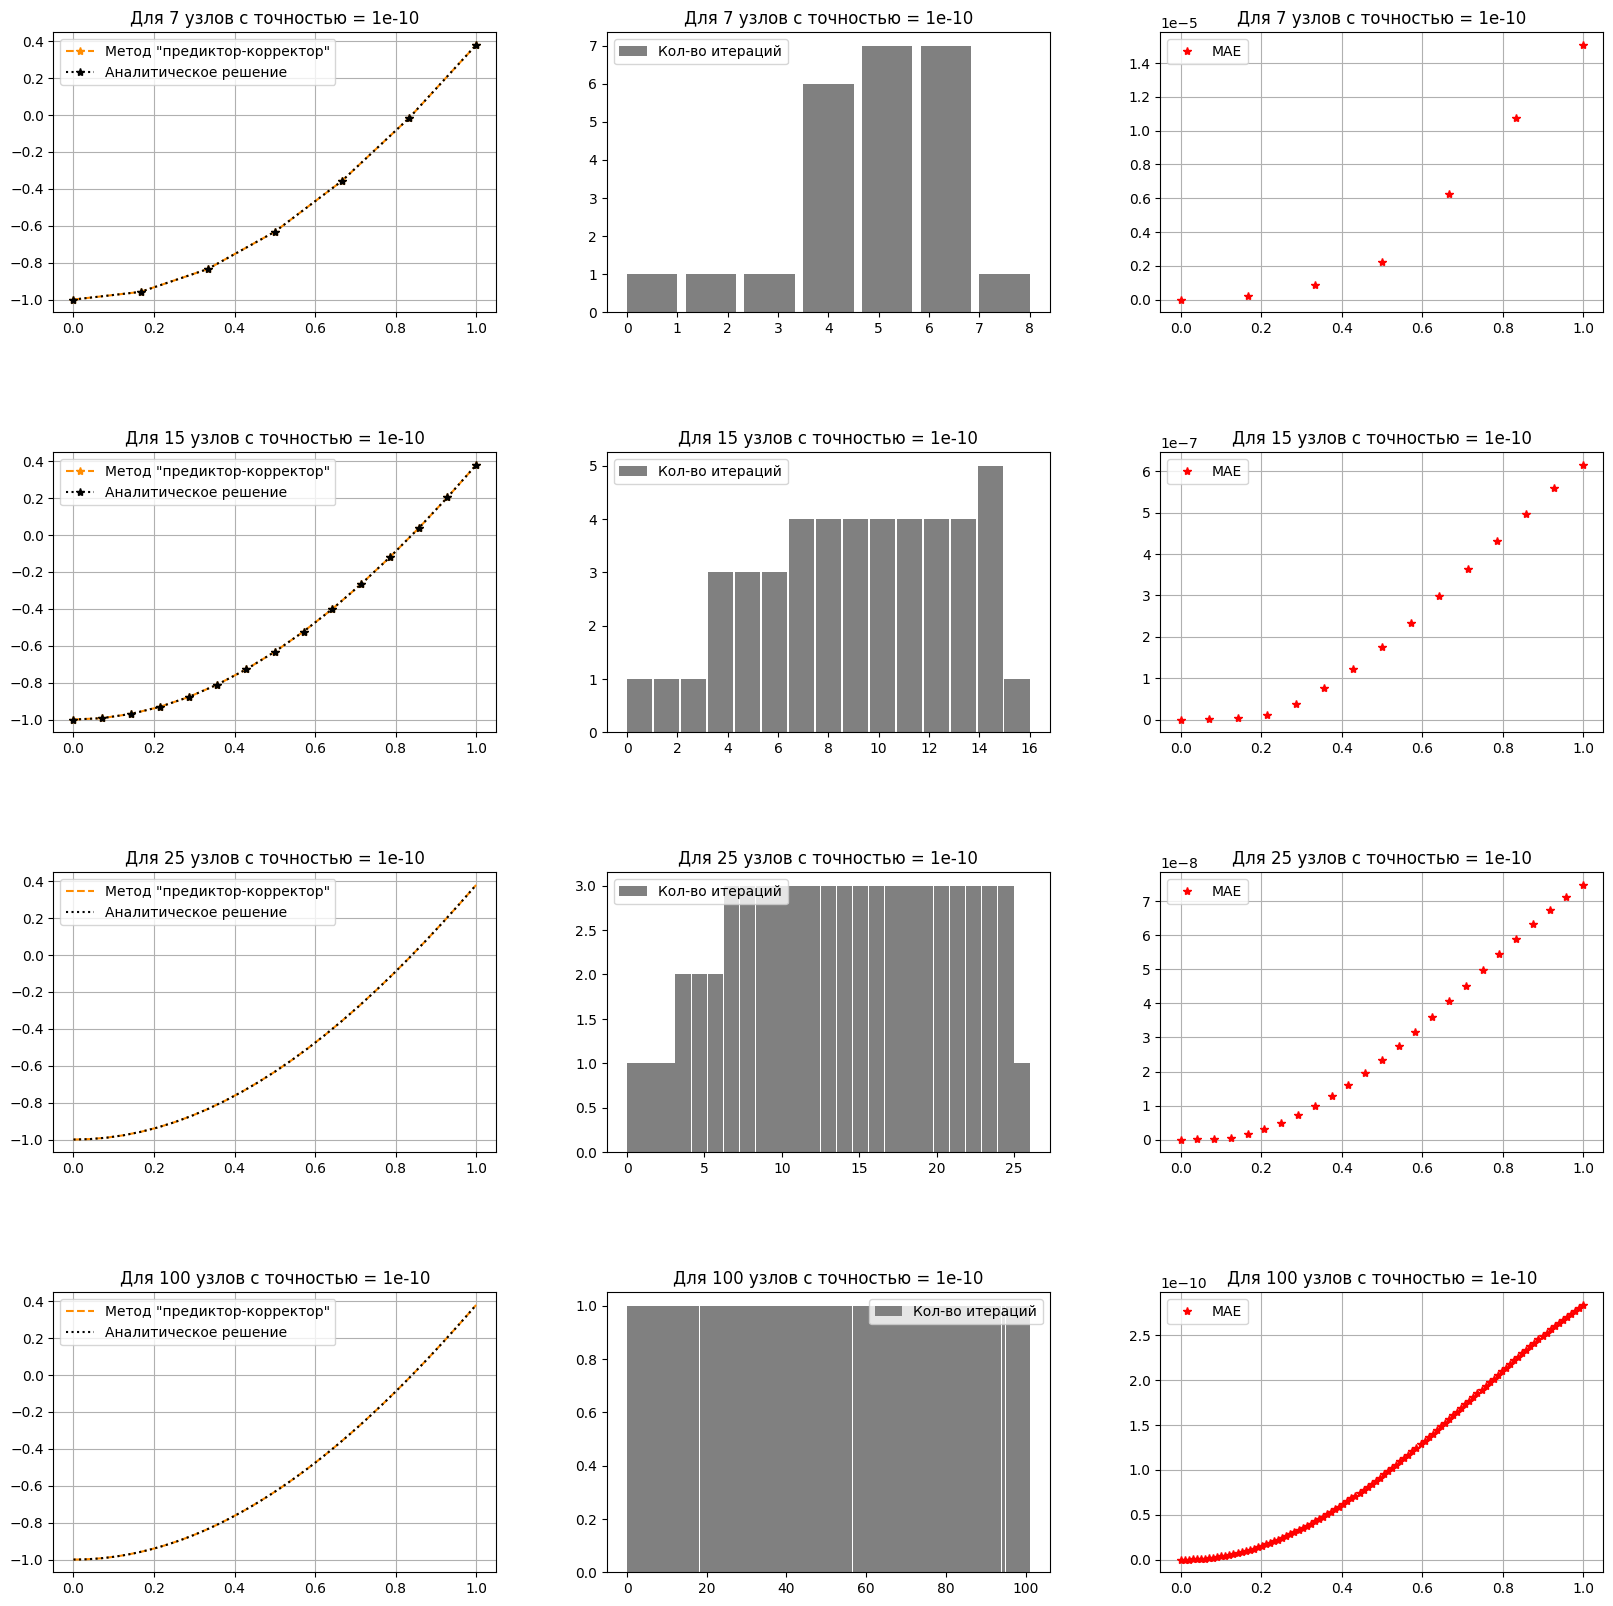

In [11]:
fig, axis = plt.subplots(4, 3)

axisr = axis[:, 0]
axisi = axis[:, 1]
axise = axis[:, 2]

grids = []
solvers = []

fig.set_figwidth(20)
fig.set_figheight(20)
fig.subplots_adjust(wspace = 0.25, hspace = 0.5)

for n in ns:
    grid = np.linspace(0, 1, n)
    grids.append(grid)
    solvers.append(Solver(grid=grid, f=f, u_0=u_0))
    

for axr, axi, axe, grid, solver in zip(axisr.flatten(), axisi.flatten(), axise.flatten(), grids, solvers):

    axr.grid(True)
    axe.grid(True)
    res = solver.Adams(eps=eps)
    if len(grid) < 20:
        axr.plot(grid, res[0], '*--', color='darkorange', label='Метод "предиктор-корректор"')
        axr.plot(grid, actual(grid), '*:', color='black', label='Аналитическое решение')
    else:
        axr.plot(grid, res[0], '--', color='darkorange', label='Метод "предиктор-корректор"')
        axr.plot(grid, actual(grid), ':', color='black', label='Аналитическое решение')
            
    axi.bar(np.linspace(0, len(grid),len(grid)), res[1], width=1, align='edge', color='grey', label='Кол-во итераций')
    axe.plot(grid, abs(actual(grid)-res[0]), '*', color='red', label='MAE')
        
    axr.set_title(f'Для {len(grid)} узлов с точностью = {eps}')
    axr.legend()
    axi.set_title(f'Для {len(grid)} узлов с точностью = {eps}')
    axi.legend()
    axe.set_title(f'Для {len(grid)} узлов с точностью = {eps}')
    axe.legend()
    
fig.savefig('res3', dpi=600)